SDSS Quasar Research

Sample code and steps for learning how to analyze the fits data with python using astropy

1. Download DR12 fits catalog from here: http://data.sdss3.org/sas/dr12/boss/qso/DR12Q/DR12Q.fits

2. Edit the location where the fits file is saved and then execute each code snippet *note the location of the fits file needs to be entered relative to wherever the code is executing (interactive python interpreter / .py / jupyter)

In [2]:
%matplotlib inline

import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

hdulist = fits.open('../../data/DR12Q.fits')
tbdata = hdulist[1].data

How many quasars are in the catalog?

In [3]:
numquasars = len(tbdata)
print('\nThere are ' + str(numquasars) + ' quasars in the DR12 catalog')


There are 297301 quasars in the DR12 catalog


How many quasars in the catalog were previously observed in SDSS?

In [4]:
a, counts = np.unique(tbdata['NSPEC_BOSS'], return_counts=True)
#b = np.array([a,counts]).T
#print(b)
#print('\n')
print('\n' + str(numquasars - counts[0]) + ' quasars were previously observed in SDSS')


28105 quasars were previously observed in SDSS


What is the redshift distribution of the quasar sample?


The max redshift value is 6.44
The min redshift value is 0.0409691445529


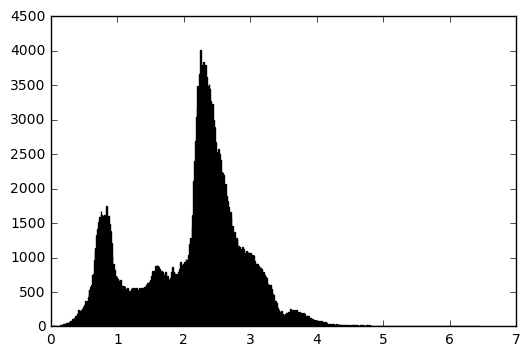

In [5]:
idx = 'Z_VI'
z_max = np.max(tbdata[idx])
z_min = np.min(tbdata[idx])
print('\nThe max redshift value is ' + str(z_max))
print('The min redshift value is ' + str(z_min))

z_hist = plt.hist(tbdata[idx], bins = 500)
plt.show()

What is the color-magnitude distribution (e.g., ‘g’ vs. ‘g-r’) of the quasar sample for different redshift bins?

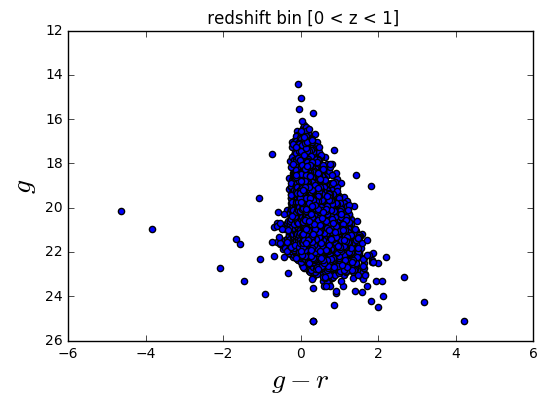

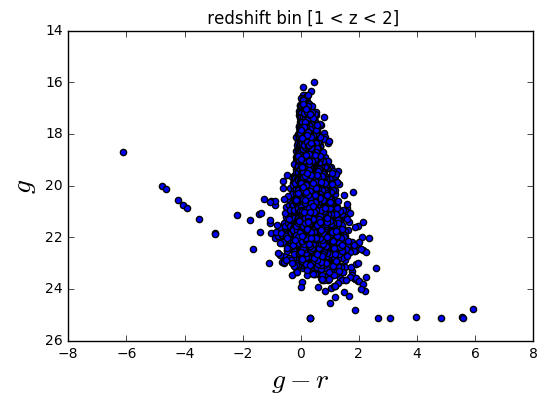

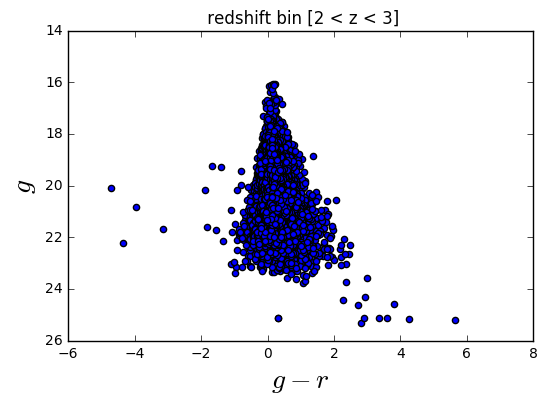

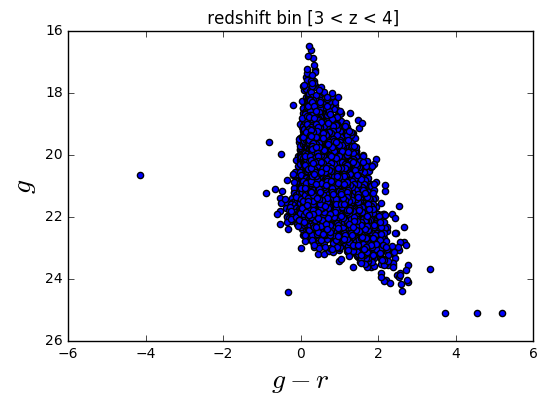

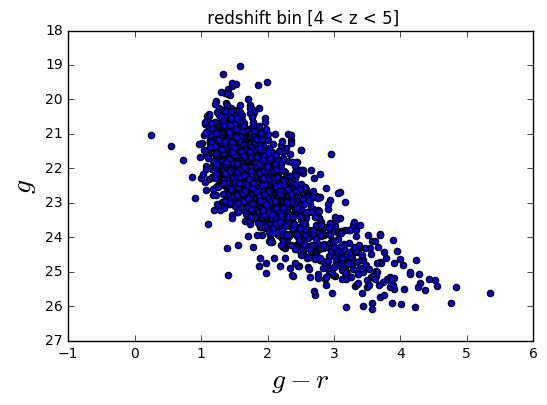

In [7]:
for i in xrange(0,5):

    # separate quasars into redshift bins
    d = tbdata[(tbdata[idx] >= i) & (tbdata[idx] < (i + 1))]

    # pull out the color maqnitude values which are contained in an array inside one column, not separate columns
    # PSFMAG	float64[5]	mag	PSF magnitudes in u, g, r, i, z band
    d = d['PSFMAG']

    # remove outliers (some have g, r values much less than 0..)
    d = d[(d[:,1] > 0) & (d[:,2] > 0)]

    # get g and r values into separate arrays
    g = d[:,1]
    r = d[:,2]

    # setup scatter plot
    plt.scatter(g - r, g)
    plt.title(' redshift bin [' + str(i) + ' < z < ' + str(i+1) + ']')
    plt.ylim(reversed(plt.ylim()))
    plt.xlabel("$g-r$", fontsize=20)
    plt.ylabel("$g$", fontsize=20)
    plt.show()

What fraction of the sample is “radio-loud”, as determined from radio surveys?

About 10% as noted here and various other papers analyzing SDSS data: https://skyserver.sdss.org/dr12/en/proj/advanced/quasars/whatare.aspx

How can we determine this from the data?

What fraction of the sample are Broad Absorption Line (BAL) quasars, as a function of redshift?